In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()

True

In [33]:
llm = ChatGoogleGenerativeAI(model = 'gemini-2.5-pro')

In [34]:
class JokeState(TypedDict):

    topic : str
    joke : str
    explanation : str
    

In [35]:
def generate_joke(state: JokeState):

    prompt = f"generate a joke on the topic {state['topic']}"
    response = llm.invoke(prompt).content

    return {'joke': response}

In [36]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke -{state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [37]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer = checkpointer)

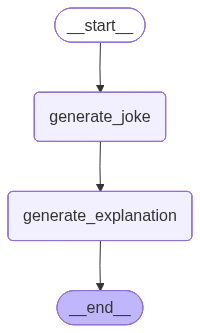

In [38]:
workflow

In [39]:
config1 = {'configurable': {'thread_id': "1"}}
workflow.invoke({'topic':'pizza'}, config = config1)

{'topic': 'pizza',
 'joke': 'What did the pepperoni say to the cheese?\n\n"Slice to meet you!"',
 'explanation': 'Of course! Here is an explanation of the joke.\n\n### The Breakdown of the Joke\n\nThis is a classic example of a **pun**. A pun is a form of wordplay that uses a word or phrase that has two different meanings, or that sounds like another word.\n\nHere\'s how it works:\n\n1.  **The Original Phrase:** The joke plays on the common, polite greeting, "**Nice to meet you.**" This is what someone typically says when they are introduced to a new person.\n\n2.  **The Pun:** The punchline swaps the word "**Nice**" with "**Slice**." These two words sound very similar, especially when said quickly.\n\n3.  **The Connection:** The word "Slice" is directly related to the characters in the joke—pepperoni and cheese.\n    *   **Pepperoni** is almost always served in thin, round **slices**.\n    *   **Cheese** is also very often cut into **slices** (for sandwiches, crackers, or pizza).\n\n#

In [42]:
list(workflow.get_state_history(config1))   # to check state history

[StateSnapshot(values={'topic': 'pizza', 'joke': 'What did the pepperoni say to the cheese?\n\n"Slice to meet you!"', 'explanation': 'Of course! Here is an explanation of the joke.\n\n### The Breakdown of the Joke\n\nThis is a classic example of a **pun**. A pun is a form of wordplay that uses a word or phrase that has two different meanings, or that sounds like another word.\n\nHere\'s how it works:\n\n1.  **The Original Phrase:** The joke plays on the common, polite greeting, "**Nice to meet you.**" This is what someone typically says when they are introduced to a new person.\n\n2.  **The Pun:** The punchline swaps the word "**Nice**" with "**Slice**." These two words sound very similar, especially when said quickly.\n\n3.  **The Connection:** The word "Slice" is directly related to the characters in the joke—pepperoni and cheese.\n    *   **Pepperoni** is almost always served in thin, round **slices**.\n    *   **Cheese** is also very often cut into **slices** (for sandwiches, crack

In [44]:
config3 = {'configurable': {'thread_id': "3"}}
workflow.invoke({'topic':'chowmin'}, config = config3)

{'topic': 'chowmin',
 'joke': 'Why did the chow mein get a job as a tour guide?\n\nBecause it was great at **chow-mein** people the way',
 'explanation': 'Of course! Here is a breakdown of the joke:\n\nThis joke is a classic **pun**, which is a form of wordplay that uses words with similar sounds but different meanings.\n\n1.  **The Setup:** "Why did the chow mein get a job as a tour guide?" This creates a silly scenario, making you wonder what a noodle dish could possibly do as a tour guide.\n\n2.  **The Punchline:** "Because it was great at **chow-mein** people the way."\n\n3.  **The Pun Explained:** The phrase "**chow-mein**" is meant to sound just like the word "**showing**."\n\nIf you replace the pun with the real word, the sentence becomes:\n\n"Because it was great at **showing** people the way."\n\nAnd what is the main job of a tour guide? To **show** people the way. The humor comes from the unexpected and slightly goofy substitution of "chow mein" for "showing."'}

In [45]:
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'chowmin', 'joke': 'Why did the chow mein get a job as a tour guide?\n\nBecause it was great at **chow-mein** people the way', 'explanation': 'Of course! Here is a breakdown of the joke:\n\nThis joke is a classic **pun**, which is a form of wordplay that uses words with similar sounds but different meanings.\n\n1.  **The Setup:** "Why did the chow mein get a job as a tour guide?" This creates a silly scenario, making you wonder what a noodle dish could possibly do as a tour guide.\n\n2.  **The Punchline:** "Because it was great at **chow-mein** people the way."\n\n3.  **The Pun Explained:** The phrase "**chow-mein**" is meant to sound just like the word "**showing**."\n\nIf you replace the pun with the real word, the sentence becomes:\n\n"Because it was great at **showing** people the way."\n\nAnd what is the main job of a tour guide? To **show** people the way. The humor comes from the unexpected and slightly goofy substitution of "chow mein" for "showi

# Time Travel

In [46]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'What did the pepperoni say to the cheese?\n\n"Slice to meet you!"', 'explanation': 'Of course! Here is an explanation of the joke.\n\n### The Breakdown of the Joke\n\nThis is a classic example of a **pun**. A pun is a form of wordplay that uses a word or phrase that has two different meanings, or that sounds like another word.\n\nHere\'s how it works:\n\n1.  **The Original Phrase:** The joke plays on the common, polite greeting, "**Nice to meet you.**" This is what someone typically says when they are introduced to a new person.\n\n2.  **The Pun:** The punchline swaps the word "**Nice**" with "**Slice**." These two words sound very similar, especially when said quickly.\n\n3.  **The Connection:** The word "Slice" is directly related to the characters in the joke—pepperoni and cheese.\n    *   **Pepperoni** is almost always served in thin, round **slices**.\n    *   **Cheese** is also very often cut into **slices** (for sandwiches, crack

In [52]:
workflow.get_state({"configurable": {"thread_id":"1", "checkpoint_id":"1f092cdf-785b-6a06-8000-404d08b729f9"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f092cdf-785b-6a06-8000-404d08b729f9'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-16T07:22:56.717230+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f092cdf-7830-62bb-bfff-ba0536148f5b'}}, tasks=(PregelTask(id='f9843951-2267-8282-8632-dddc8f5e0956', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'What did the pepperoni say to the cheese?\n\n"Slice to meet you!"'}),), interrupts=())

In [53]:
workflow.invoke(None, {"configurable": {"thread_id":"1", "checkpoint_id":"1f092cdf-785b-6a06-8000-404d08b729f9"}})

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-pro"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 2
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 39
}
].
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing de

{'topic': 'pizza',
 'joke': "Why did the mushroom get invited to all the pizza parties?\n\nBecause he's a *fun-gi* to be with",
 'explanation': 'Of course! Here is an explanation of the joke.\n\nThis is a classic pun, which means the humor comes from a play on words.\n\nHere\'s the breakdown:\n\n1.  **The Sound-Alike:** The punchline "fun-gi" is meant to be heard as the phrase **"fun guy."** Someone who is a "fun guy" is enjoyable to be around and would naturally be invited to parties.\n\n2.  **The Literal Meaning:** A mushroom is a type of **fungus**. The plural of fungus is **fungi**.\n\nSo, the joke cleverly combines these two meanings. The mushroom gets invited to parties because he\'s a **"fun guy"** (a great personality), and the word used to describe this is **"fun-gi"** (his biological classification).\n\nThe joke is extra fitting because mushrooms are a common pizza topping, so it makes perfect sense for one to be at a pizza party in the first place'}

In [54]:
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'chowmin', 'joke': 'Why did the chow mein get a job as a tour guide?\n\nBecause it was great at **chow-mein** people the way', 'explanation': 'Of course! Here is a breakdown of the joke:\n\nThis joke is a classic **pun**, which is a form of wordplay that uses words with similar sounds but different meanings.\n\n1.  **The Setup:** "Why did the chow mein get a job as a tour guide?" This creates a silly scenario, making you wonder what a noodle dish could possibly do as a tour guide.\n\n2.  **The Punchline:** "Because it was great at **chow-mein** people the way."\n\n3.  **The Pun Explained:** The phrase "**chow-mein**" is meant to sound just like the word "**showing**."\n\nIf you replace the pun with the real word, the sentence becomes:\n\n"Because it was great at **showing** people the way."\n\nAnd what is the main job of a tour guide? To **show** people the way. The humor comes from the unexpected and slightly goofy substitution of "chow mein" for "showi

## Updating State

In [56]:
workflow.update_state({"configurable": {"thread_id": "3", "checkpoint_id": "1f092d0a-abef-6688-8000-5659dc54c993" ,"checkpoint_ns":"" }}, {'topic': 'samosa'})

{'configurable': {'thread_id': '3',
  'checkpoint_ns': '',
  'checkpoint_id': '1f093058-d1a5-615e-8001-30a60db59fe8'}}

In [57]:
list(workflow.get_state_history(config3))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f093058-d1a5-615e-8001-30a60db59fe8'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-09-16T14:00:49.991678+00:00', parent_config={'configurable': {'thread_id': '3', 'checkpoint_ns': '', 'checkpoint_id': '1f092d0a-abef-6688-8000-5659dc54c993'}}, tasks=(PregelTask(id='9e78ab2c-69cf-a1f8-3214-55ea987c7d15', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'chowmin', 'joke': 'Why did the chow mein get a job as a tour guide?\n\nBecause it was great at **chow-mein** people the way', 'explanation': 'Of course! Here is a breakdown of the joke:\n\nThis joke is a classic **pun**, which is a form of wordplay that uses words with similar sounds but different meanings.\n\n1.  **The Setup:** "Why did the cho

In [59]:
workflow.invoke(None, {"configurable":{"thread_id": "3", "chekcpoint_id": "1f093058-d1a5-615e-8001-30a60db59fe8"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa get invited to all the parties?\n\nBecause he was a real snack with all the right angles',
 'explanation': 'Of course! Here is a breakdown of the joke.\n\nThe humor in this joke comes from a **pun**, which plays on the double meanings of two key phrases in the punchline: "**a real snack**" and "**all the right angles**."\n\nLet\'s break it down:\n\n### 1. "A real snack"\n\n*   **Literal Meaning:** A samosa is, quite literally, a snack. It\'s a savory pastry, a type of food you eat.\n*   **Slang Meaning:** In modern slang, calling a person "a snack" is a compliment that means they are very attractive or good-looking.\n\nSo, the first part of the joke implies the samosa is popular because it\'s both a delicious food item and an attractive "person" at the party.\n\n### 2. "With all the right angles"\n\n*   **Literal Meaning:** A samosa is famous for its distinct triangular or pyramid-like shape. It is physically made up of sharp corners and

In [21]:
!pip show google-generativeai

In [22]:
import sys
print(sys.executable)

d:\LangGraph\part_1\myenv\Scripts\python.exe


In [25]:
import google.generativeai as genai

# List all available models
for m in genai.list_models():
    print(m.name, m)


models/embedding-gecko-001 Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representation of a text.',
      input_token_limit=1024,
      output_token_limit=1,
      supported_generation_methods=['embedText', 'countTextTokens'],
      temperature=None,
      max_temperature=None,
      top_p=None,
      top_k=None)
models/gemini-1.5-pro-latest Model(name='models/gemini-1.5-pro-latest',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Pro Latest',
      description=('Alias that points to the most recent production (non-experimental) release '
                   'of Gemini 1.5 Pro, our mid-size multimodal model that supports up to 2 '
                   'million tokens.'),
      input_token_limit=2000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperat